In [5]:
import numpy as np
import pandas as pd

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

train_data=pd.read_csv("../data/kc_house_train_data.csv",dtype=dtype_dict)
test_data =pd.read_csv("../data/kc_house_test_data.csv",dtype=dtype_dict)

sales = pd.read_csv('../data/kc_house_data.csv', dtype=dtype_dict)
# sales = sales.sort_values(['sqft_living','price'])
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


In [6]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe=data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_array=data_sframe[output].to_numpy()
    # the following will convert the SArray into a numpy array by first converting it to a list
#     output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [7]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [8]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant==True:
        derivative=2*np.sum(errors*feature)
    elif feature_is_constant==False:
        derivative=2*np.sum(errors*feature)+2*l2_penalty*weight
    return derivative

In [9]:
# def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
#     if feature_is_constant == False:
#         derivative = (np.dot(errors,feature))*2 + 2*l2_penalty*weight
#     else:
#         derivative = np.dot(errors,feature)*2
#     return derivative

In [10]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20)



-56554166815950.0
-56554166815950.0


In [11]:
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2)

-22446749330.0
-22446749330.0


In [12]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations):
    weights = np.array(initial_weights) # make sure it's a numpy array
        #while not reached maximum number of iterations:
    for j in range(max_iterations):
        # compute the predictions using your predict_output() function
        predictions=predict_output(feature_matrix,weights)
        # compute the errors as predictions - output
        errors=predictions-output
        
        for i in range(len(weights)): # loop over each weight
#             print("hi")
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i==0:
                weights[i]=weights[i]-step_size*feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,True)
            else:
                weights[i]=weights[i]-step_size*feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,False)
                
            # subtract the step size times the derivative from the current weight  
    return weights


In [13]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
initial_weights=[0.0]*simple_feature_matrix.shape[1]

In [14]:
simple_weights_0_penalty=ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,1e-12,0.0,1000)

In [15]:
simple_weights_0_penalty

array([-1.63113515e-01,  2.63024369e+02])

In [16]:
simple_weights_high_penalty=ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,1e-12,1e11,1000)

In [17]:
simple_weights_high_penalty

array([  9.76730382, 124.57217567])

In [18]:
predictions=predict_output(simple_feature_matrix,np.array([1]*simple_feature_matrix.shape[1]))
predictions

array([1181., 2571.,  771., ..., 1531., 1601., 1021.])

In [19]:
output

array([221900., 538000., 180000., ..., 360000., 400000., 325000.])

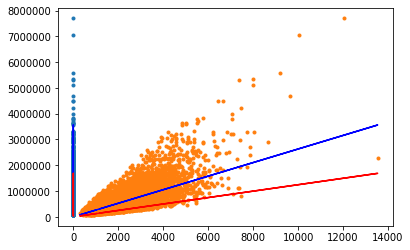

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [21]:
def get_rss(predictions,output):
    RSS=predictions-output
    RSS=RSS*RSS
    RSS=RSS.sum()
    return RSS

In [22]:
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
predictions=predict_output(simple_test_feature_matrix, initial_weights)
l1=get_rss(predictions,test_output)
l1

1784273286136298.0

In [23]:
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
predictions=predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
l2=get_rss(predictions,test_output)
l2

275723632153607.44

In [24]:
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
predictions=predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
l3=get_rss(predictions,test_output)
l3

694642101489902.5

In [25]:
l=[l1,l2,l3]
min(l)

275723632153607.44

In [26]:
from decimal import Decimal

for i in l:
    print('%.2E' % Decimal(i))

1.78E+15
2.76E+14
6.95E+14


In [27]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
initial_weights=[0]*feature_matrix.shape[1]

In [28]:
multiple_weights_0_penalty=ridge_regression_gradient_descent(feature_matrix,output,initial_weights,1e-12,0.0,1000)

In [29]:
multiple_weights_0_penalty

array([  0, 172,  96])

In [30]:
multiple_weights_high_penalty=ridge_regression_gradient_descent(feature_matrix,output,initial_weights,1e-12,1e11,1000)

In [31]:
multiple_weights_high_penalty

array([ 0, 90, 78])

In [32]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
predictions=predict_output(test_feature_matrix, initial_weights)
l1=get_rss(predictions,test_output)
l1

1784273286136298.0

In [33]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
predictions=predict_output(test_feature_matrix, multiple_weights_0_penalty)
l2=get_rss(predictions,test_output)
l2

278274751545834.0

In [34]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
predictions=predict_output(test_feature_matrix, multiple_weights_high_penalty)
l3=get_rss(predictions,test_output)
l3

508766210244362.0

In [35]:
l=[l1,l2,l3]
min(l)

278274751545834.0

In [36]:
from decimal import Decimal

for i in l:
    print('%.2E' % Decimal(i))

1.78E+15
2.78E+14
5.09E+14


In [37]:
test_data[:1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,constant
0,0114101516,20140528T000000,310000.0,3.0,1.0,1430.0,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0,1


In [38]:
(test_feature_matrix, test_output) = get_numpy_data(test_data[:1], model_features, my_output)

prediction=predict_output(test_feature_matrix,multiple_weights_0_penalty)
print(prediction)
print(get_rss(prediction,test_output))

[416840.]
11414785600.0


/home/prachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
(test_feature_matrix, test_output) = get_numpy_data(test_data[:1], model_features, my_output)

prediction=predict_output(test_feature_matrix,multiple_weights_high_penalty)
print(prediction)
print(get_rss(prediction,test_output))

[267540.]
1802851600.0


/home/prachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
print(test_data[:1]['price'])

0    310000.0
Name: price, dtype: float64
